# Applied Machine Learning (Assignment # 1)

### K-Means Clustering

#### Importing the Dataset and Filling the Missing Values

In [1]:
import pandas as pd

file_path = "data/kmeans_dataset.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=['Customer_ID'])

# Filling missing features with median of each feature/column
df = df.fillna(df.median())

print("Dataset loaded and missing values handled.")
df.head()


Dataset loaded and missing values handled.


,Age,Annual_Income,Spending_Score,Website_Visits,Product_Categories_Purchased,Total_Purchase_Amount,Average_Session_Duration,Return_Rate,Discount_Usage
0,56.0,299578.0,26.0,3.0,7.0,99756.0,33.0,24.68,66.66
1,69.0,80313.0,62.0,27.0,9.0,26863.5,17.0,35.11,16.27
2,46.0,137813.0,4.0,7.0,5.0,7110.0,24.0,49.64,56.51
3,32.0,83687.0,89.0,14.0,10.0,6930.0,34.0,6.57,77.16
4,60.0,123632.0,42.0,20.0,3.0,40422.0,28.0,13.74,49.89


#### Applying Z-Score Normalization (Robust to Outliers)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_data = scaler.fit_transform(df)

print("Z-score normalization applied.\n")

zscore_normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print("First 2 rows after Z-score normalization:")
print(zscore_normalized_df.head(2))


#### Applying MinMax Normalization (Sensitive to Outliers)

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

print("First 2 normalized rows:\n", normalized_data[:2])


First 2 normalized rows:
 [[0.66666667 1.         0.25252525 0.06896552 0.66666667 1.
  0.54237288 0.49458701 0.66847172]
 [0.89473684 0.24219698 0.61616162 0.89655172 0.88888889 0.26441798
  0.27118644 0.70368885 0.16315684]]


#### Elbow Method to Check for Optimal (K) with Visualization

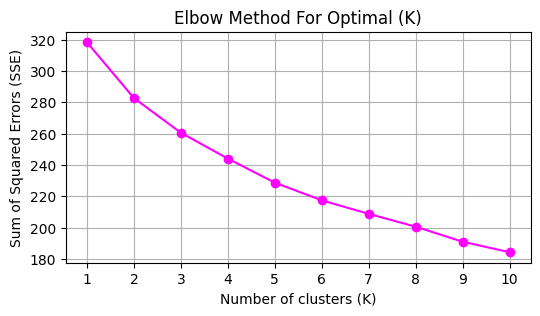

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def calculate_sse_and_plot(data, max_k=10):
    """
    -> data is normalized dataset
    -> max_k is maximum values of (K) to check for
    """
    sse = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)  

    # Plotting results
    plt.figure(figsize=(6, 3))
    plt.plot(k_values, sse, marker='o', color='magenta')
    plt.title('Elbow Method For Optimal (K)')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

calculate_sse_and_plot(normalized_data)


#### Silhouette Score to Check for Optimal (K) with Visualization

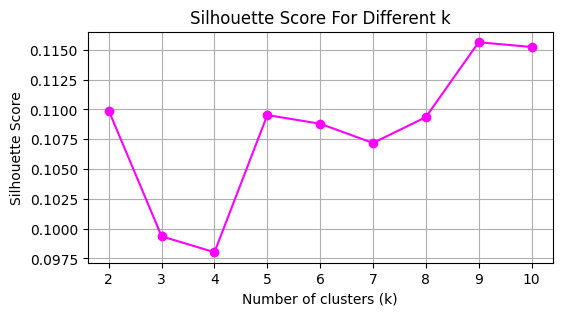

In [4]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_and_plot(data, min_k=2, max_k=10):
    """
    -> Needs minimum of 2 clusters to start
    -> data is normalized dataset
    -> min_k and max_k are ranges for clustering
    """
    silhouette_scores = []
    k_values = range(min_k, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)

    # Plotting results
    plt.figure(figsize=(6, 3))
    plt.plot(k_values, silhouette_scores, marker='o', color='magenta')
    plt.title('Silhouette Score For Different k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

calculate_silhouette_and_plot(normalized_data)


###### We can see from plotted graphs that in both scenarios, (9) is the optimal (K) we are getting.
###### Elbow Method gives us bend at K=9.
###### Silhouette Score is highest at k=9.
###### So, that is how we choose K=9 to be the optimal value of (K).

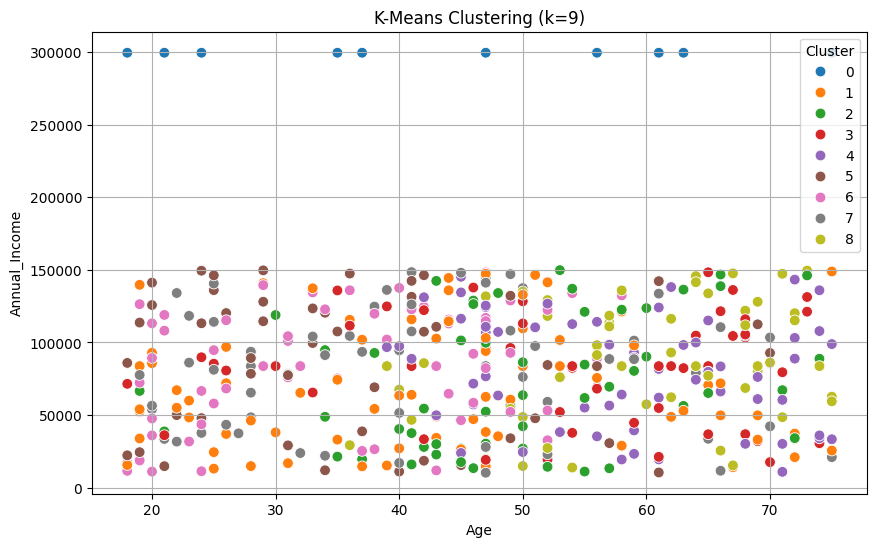

In [5]:
import seaborn as sns

# Selected K=9
k = 9
kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
cluster_labels = kmeans.fit_predict(normalized_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Features variation
feature1 = df.columns[0]
feature2 = df.columns[1]

# Plotting results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df[feature1], 
    y=df[feature2], 
    hue=df['Cluster'], 
    palette='tab10', 
    s=60
)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#### Calculating Average values of each Feature for each Cluster

In [6]:
# Calculating the average values of each feature for each cluster
cluster_summary = df.groupby('Cluster').mean()

print("Average feature values per cluster:")
display(cluster_summary)


Average feature values per cluster:


,Age,Annual_Income,Spending_Score,Website_Visits,Product_Categories_Purchased,Total_Purchase_Amount,Average_Session_Duration,Return_Rate,Discount_Usage
Cluster,,,,,,,,,
0,43.700000,299578.000000,34.000000,14.200000,5.700000,99756.000000,32.300000,29.141000,47.502000
1,42.949367,71853.822785,27.405063,20.037975,7.417722,25353.563291,43.443038,17.150253,56.438228
2,50.338983,72976.644068,71.050847,23.881356,3.711864,26833.635593,21.661017,16.058644,43.374237
3,52.037037,81952.148148,34.296296,11.759259,6.759259,23742.194444,14.000000,34.450926,73.683519
4,57.718310,80532.760563,32.014085,7.788732,3.084507,25576.936620,31.309859,25.013099,39.300282
5,36.313725,88142.647059,65.686275,14.490196,2.745098,26742.941176,45.784314,26.682941,69.693529
6,34.967213,83525.000000,72.393443,8.622951,7.393443,25214.262295,24.803279,15.127541,52.274426
7,40.566667,81751.750000,30.766667,23.650000,4.050000,25880.600000,23.500000,35.582167,26.088833
8,59.781818,85306.381818,74.854545,16.909091,7.545455,25327.981818,37.145455,34.018182,35.415818


#### A Heatmap to Display the Results of these Clusters of Features

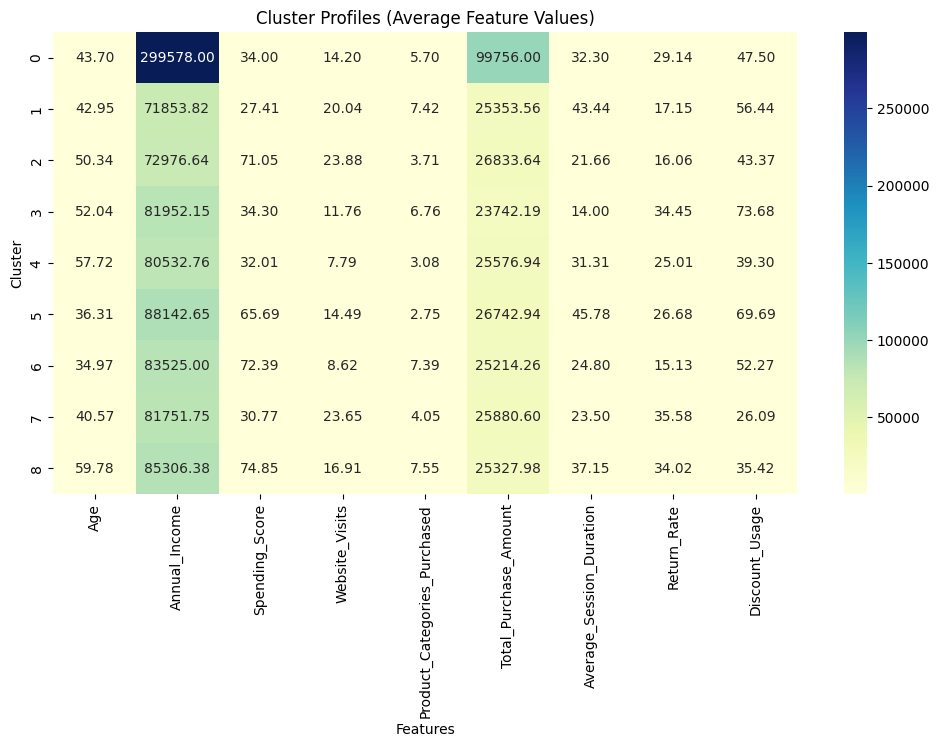

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Cluster Profiles (Average Feature Values)")
plt.ylabel("Cluster")
plt.xlabel("Features")
plt.show()